# Logo Detection - Flickr Logos 27 Dataset



In [ ]:
DATA_ROOT = "/kaggle/input/flickr-logos-27-dataset"
WORK_DIR = "/kaggle/working/flickrlogos27"

os.makedirs(WORK_DIR, exist_ok=True)
print("DATA_ROOT:", DATA_ROOT)


DATA_ROOT: /kaggle/input/flickr-logos-27-dataset


In [1]:
import zipfile
import os

zip_filename = '/content/archive (2).zip'


extract_folder = "/content/extracted_files"
os.makedirs(extract_folder, exist_ok=True)


with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f" Files extracted to: {extract_folder}")


print("\nExtracted files:")
for root, dirs, files_list in os.walk(extract_folder):
    for file in files_list:
        print(os.path.join(root, file))


✅ Files extracted to: /content/extracted_files

Extracted files:
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/2680574577.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/2698169582.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/3164722529.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/389081363.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/744776649.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images/542894584.jpg
/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dropout,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

import cv2
import tensorflow as tf
import tensorflow_datasets.public_api as tfds

In [4]:
dest = "LOGOS"

if not os.path.exists(dest):
    os.makedirs(dest)

**Preprocessing**

In [5]:
import pandas as pd
df = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-937372181.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)


In [6]:
df

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [44]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
df.info()
df.describe(include="all")


Shape: (4536, 7)

Columns: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4536 non-null   object
 1   1       4536 non-null   object
 2   2       4536 non-null   int64 
 3   3       4536 non-null   int64 
 4   4       4536 non-null   int64 
 5   5       4536 non-null   int64 
 6   6       4536 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 248.2+ KB


,0,1,2,3,4,5,6
count,4536,4536,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
unique,809,27,NaN,NaN,NaN,NaN,NaN
top,3733440395.jpg,Pepsi,NaN,NaN,NaN,NaN,NaN
freq,156,389,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.277116,146.949074,120.966270,304.375000,231.778660
std,NaN,NaN,1.525430,122.357781,101.794867,122.789661,104.947444
min,NaN,NaN,1.000000,0.000000,0.000000,3.000000,17.000000
25%,NaN,NaN,3.000000,40.750000,29.750000,206.750000,156.000000
50%,NaN,NaN,5.000000,117.000000,102.000000,314.000000,231.000000
75%,NaN,NaN,6.000000,239.500000,189.250000,407.000000,308.250000


In [45]:
df.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


In [7]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [8]:
dtdir = '/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images'

In [9]:
im = df[0][0]

In [10]:
size = df.iloc[:,3:]

In [11]:
size

,3,4,5,6
0,38,12,234,142
1,242,208,413,331
2,13,5,89,60
3,43,122,358,354
4,83,63,130,93
...,...,...,...,...
4531,15,6,253,54
4532,136,161,304,222
4533,2,4,499,106
4534,1,69,342,157


In [12]:
img = os.path.join(dtdir,im)

In [13]:
size = size.values.tolist()

In [14]:
size[0][0],size[0][1],size[0][2],size[0][3]

(38, 12, 234, 142)

(210, 280, 3)

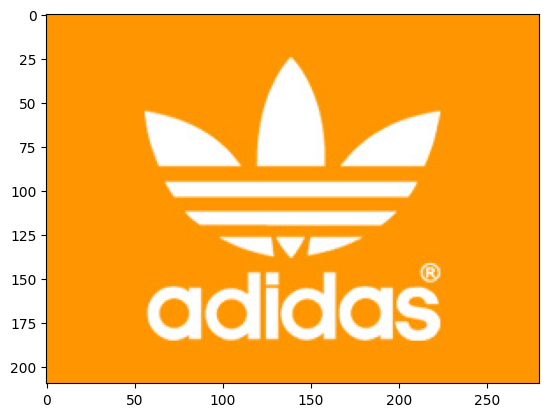

In [15]:
image = cv2.imread(img)
plt.imshow(image)
image.shape

(130, 196, 3)

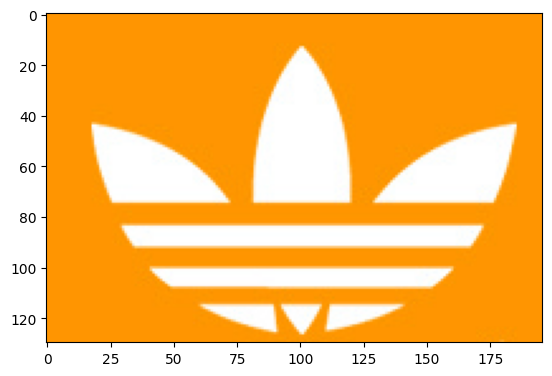

In [16]:
image = cv2.imread(img)
image = image[size[0][1]:size[0][3],size[0][0]:size[0][2]]
plt.imshow(image)
image.shape

In [17]:
query = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3346777235.py:1: SyntaxWarning: invalid escape sequence '\s'
  query = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)


In [ ]:
query

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas
...,...,...
265,3480640208.jpg,none
266,3486224308.jpg,none
267,3486430785.jpg,none
268,3490185235.jpg,none


(500, 437, 3)

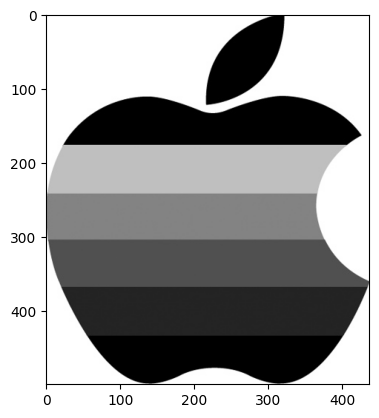

In [18]:
img = os.path.join(dtdir,query[0][5])
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [19]:
testdist = 'TEST'

In [20]:
if not os.path.exists(testdist):
    os.makedirs(testdist)

In [21]:
y = list(set(list(Y)))
y.sort()

In [22]:
for i in y:
    os.makedirs(os.path.join(testdist,i))

In [25]:
for i in y:
    os.makedirs(os.path.join(dest,i))

In [23]:
distractor = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1438772797.py:1: SyntaxWarning: invalid escape sequence '\s'
  distractor = pd.read_csv("/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)


In [26]:
distractor

,0
0,http://farm2.static.flickr.com/1184/1013364004...
1,http://farm2.static.flickr.com/1108/1047095104...
2,http://farm2.static.flickr.com/1359/1076885577...
3,http://farm1.static.flickr.com/53/110432189_6d...
4,http://farm2.static.flickr.com/1144/1153048029...
...,...
4202,http://farm2.static.flickr.com/1254/889763557_...
4203,http://farm2.static.flickr.com/1308/901063602_...
4204,http://farm1.static.flickr.com/18/93551127_fed...
4205,http://farm2.static.flickr.com/1033/978252884_...


**Removing Corrupt Images**

In [24]:
HEIGHT = 224
WIDTH =  224

In [27]:
for i in range(len(X)):
    try:
        destrain = os.path.join(dest,Y[i])
        savepath = os.path.join(destrain,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

error
error
error
error
error


In [28]:
A = query.iloc[:,0]
B = query.iloc[:,1]

In [29]:
A

,0
0,2403695909.jpg
1,2912587920.jpg
2,3441398196.jpg
3,4605630935.jpg
4,4606245138.jpg
...,...
265,3480640208.jpg
266,3486224308.jpg
267,3486430785.jpg
268,3490185235.jpg


In [30]:
for i in range(len(A)):
    try:
        destrain = os.path.join(testdist,B[i])
        savepath = os.path.join(destrain,A[i])
        img  = os.path.join(dtdir,A[i])
        image = cv2.imread(img)
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

In [31]:
imagePaths = list(paths.list_images(testdist))

TEST/Sprite/3891379215.jpg


(224, 224, 3)

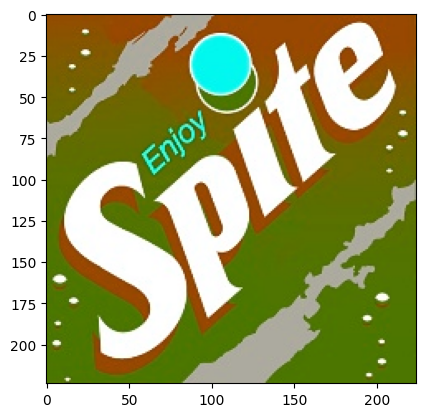

In [32]:
img = imagePaths[40]
print(img)
image = cv2.imread(img)
plt.imshow(image)
image.shape

**Image Augmentation**

In [33]:
train = ImageDataGenerator(
rescale = 1/255,
horizontal_flip=True,
vertical_flip=True,
shear_range=0.2,
zoom_range=0.2,
featurewise_center=True, # Set input mean to 0 over the dataset, feature-wise
featurewise_std_normalization=True, # Divide inputs by std of the dataset, feature-wise
rotation_range=40, # Degree range for random rotations
width_shift_range=0.2,
height_shift_range=0.2,
fill_mode='nearest',
validation_split = 0.2)

In [34]:
imagePaths = list(paths.list_images(dest))

In [35]:
os.makedirs('preview')

In [36]:
img = load_img(imagePaths[50])  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='yh', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


**Samples Visualization¶**

(224, 224, 3)

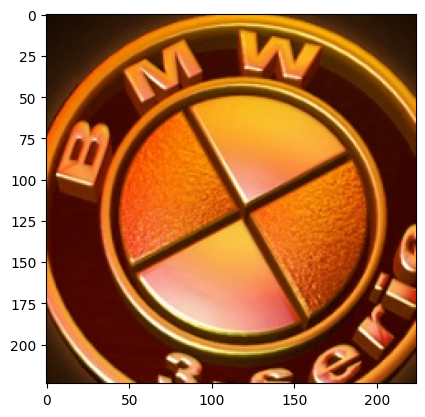

In [37]:
image = cv2.imread(imagePaths[50])
plt.imshow(image)
image.shape

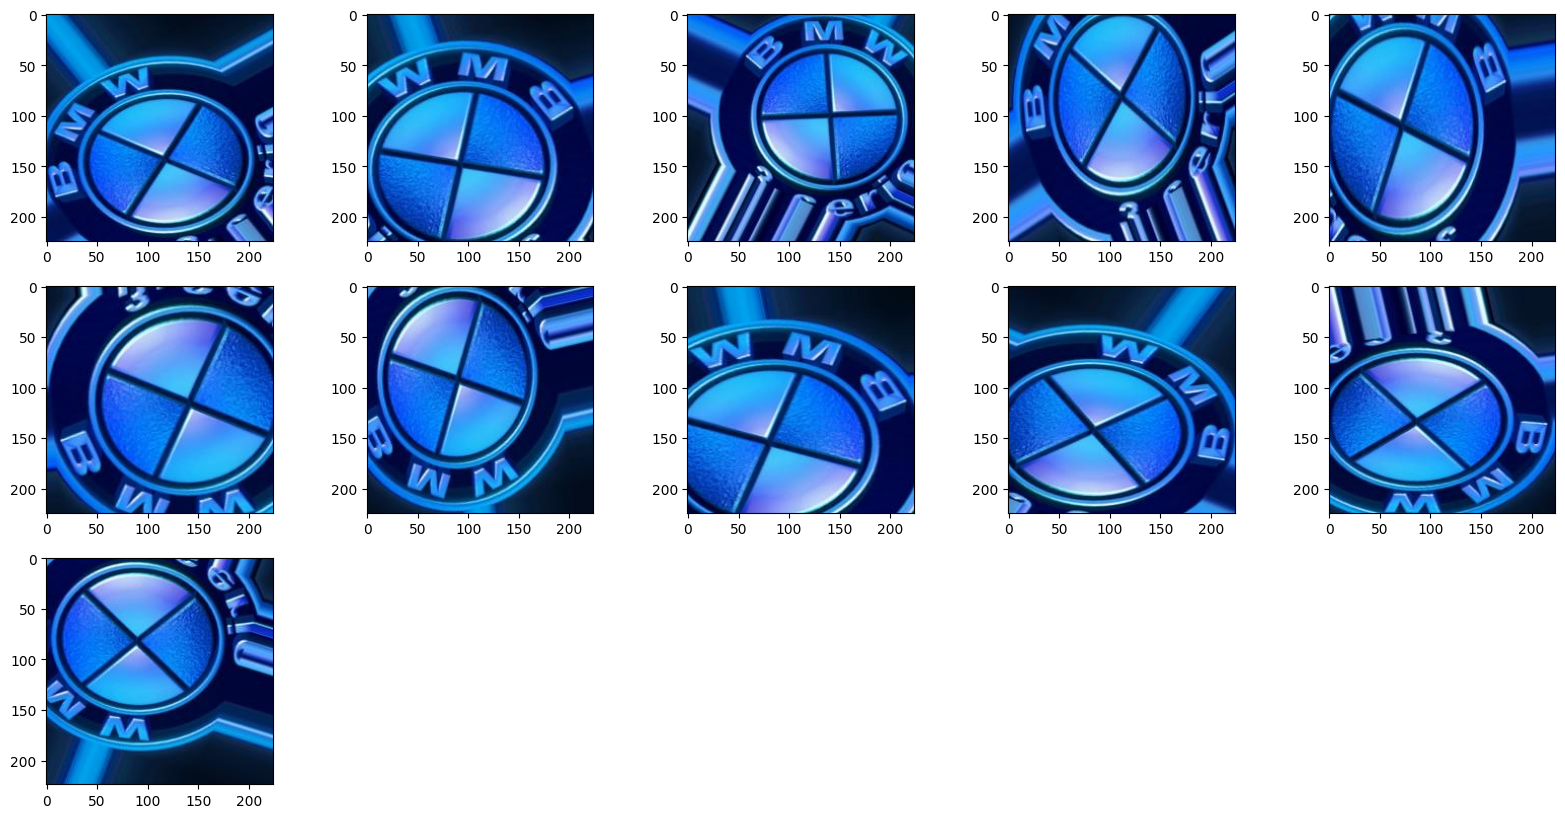

In [38]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('preview/*.jpeg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

In [39]:
HEIGHT = 224
WIDTH = 224
INIT_LR = 1e-4
EPOCHS =  100
BS = 256

**Splitting into Train and Validation Set**

In [40]:
trainset = train.flow_from_directory(dest,
target_size = (WIDTH,HEIGHT),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = 'training',
class_mode='categorical')

Found 648 images belonging to 27 classes.


In [41]:
validset = train.flow_from_directory(dest,
target_size = (WIDTH,HEIGHT),
batch_size = BS,
shuffle=False,
seed=42,
color_mode='rgb',
subset = 'validation',
class_mode='categorical')

Found 161 images belonging to 27 classes.


In [42]:
imagePaths = list(paths.list_images(dest))

In [43]:
trainset.class_indices

{'Adidas': 0,
 'Apple': 1,
 'BMW': 2,
 'Citroen': 3,
 'Cocacola': 4,
 'DHL': 5,
 'Fedex': 6,
 'Ferrari': 7,
 'Ford': 8,
 'Google': 9,
 'HP': 10,
 'Heineken': 11,
 'Intel': 12,
 'McDonalds': 13,
 'Mini': 14,
 'Nbc': 15,
 'Nike': 16,
 'Pepsi': 17,
 'Porsche': 18,
 'Puma': 19,
 'RedBull': 20,
 'Sprite': 21,
 'Starbucks': 22,
 'Texaco': 23,
 'Unicef': 24,
 'Vodafone': 25,
 'Yahoo': 26}

**Model Architecture**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(WIDTH, HEIGHT, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output

headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(trainset.num_classes, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
#sgd = SGD(lr=INIT_LR,momentum=0.9,nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer='Adam',metrics=["accuracy"])
# train the head of the network

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[INFO] compiling model...


In [ ]:
totalTrain = len(list(paths.list_images(dest)))
totalTrain

809

**Train Results**

In [ ]:
H = model.fit(
    trainset,
    validation_data=validset,
    epochs=EPOCHS
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 182s 66s/step - accuracy: 0.0090 - loss: 3.5825 - val_accuracy: 0.1615 - val_loss: 3.1573
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.2019 - loss: 2.9575 - val_accuracy: 0.1988 - val_loss: 2.9725
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.2957 - loss: 2.8228 - val_accuracy: 0.3230 - val_loss: 2.7783
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.2337 - loss: 2.7919 - val_accuracy: 0.3602 - val_loss: 2.5704
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.3683 - loss: 2.4382 - val_accuracy: 0.3602 - val_loss: 2.3852
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.3322 - loss: 2.4437 - val_accuracy: 0.4783 - val_loss: 2.2518
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.4439 - loss: 2.1215 - val_accuracy: 0.4845 - val_loss: 2.0632
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.5298 - loss: 1.8986 - val_accuracy: 0.5590 - val_loss: 1.804

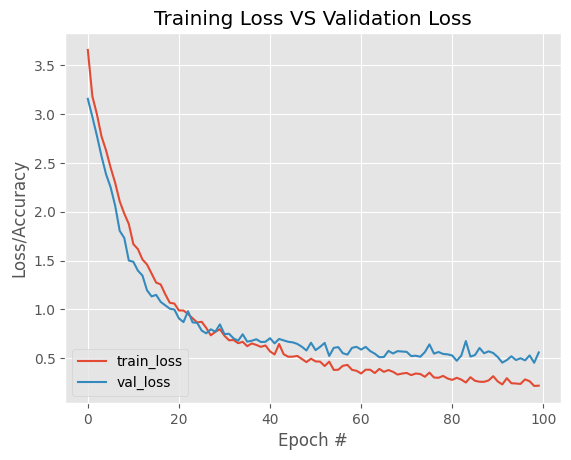

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss VS Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig('graph.png')

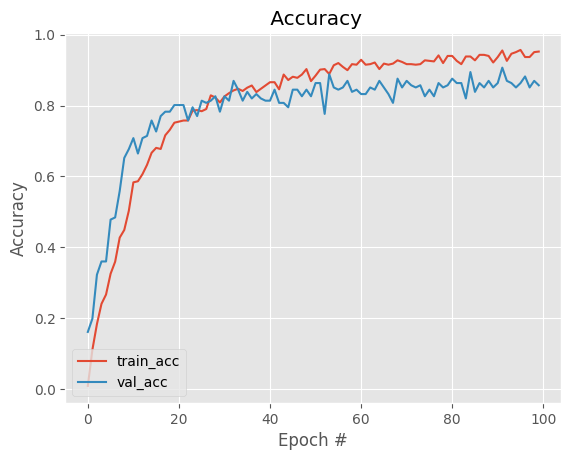

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title(" Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating after fine-tuning network...")
validset.reset()
predIdxs = model.predict(x=validset)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(validset.classes, predIdxs,
	target_names=validset.class_indices.keys()))
# serialize the model to disk

print("[INFO] serializing network...")
model.save("logo.h5")   # or model.save("logo.keras")


[INFO] evaluating after fine-tuning network...


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


              precision    recall  f1-score   support

      Adidas       0.80      0.67      0.73         6
       Apple       1.00      0.83      0.91         6
         BMW       1.00      1.00      1.00         6
     Citroen       1.00      1.00      1.00         6
    Cocacola       0.86      1.00      0.92         6
         DHL       1.00      0.83      0.91         6
       Fedex       0.86      1.00      0.92         6
     Ferrari       0.86      1.00      0.92         6
        Ford       1.00      0.83      0.91         6
      Google       0.86      1.00      0.92         6
          HP       0.80      0.67      0.73         6
    Heineken       1.00      0.83      0.91         6
       Intel       0.80      0.67      0.73         6
   McDonalds       1.00      0.67      0.80         6
        Mini       0.86      1.00      0.92         6
         Nbc       1.00      1.00      1.00         6
        Nike       0.83      0.83      0.83         6
       Pepsi       0.83    

In [ ]:
testimage = list(paths.list_images('/content/extracted_files/flickr_logos_27_dataset/flickr_logos_27_dataset_images'))


In [ ]:
model.get_config

<bound method Functional.get_config of <Functional name=functional, built=True>>

In [ ]:
from PIL import Image
def predimage(path):
    image = Image.open(path)
    plt.imshow(image)
    test = load_img(path,target_size=(WIDTH,HEIGHT))
    test = img_to_array(test)
    test = np.expand_dims(test,axis=0)
    test /= 255
    result = model.predict(test,batch_size = BS)
    y_class = result.argmax(axis=-1)
    result = (result*100)
    result = list(np.around(np.array(result),1))
    print(result)
    print(y[y_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
[array([11.7,  1.2,  0.3,  0.7,  3.2,  0.2,  5.1,  6.4,  0.1,  0.4,  0.2,
        1.8,  0.3,  1. ,  1.1,  0.9,  1.6,  0. ,  0.2,  7.8, 11.2, 39. ,
        4. ,  0.4,  0.6,  0.2,  0.1], dtype=float32)]
Sprite


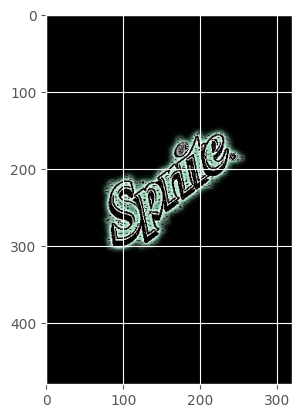

In [ ]:
predimage(testimage[56])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       100.,   0.,   0.,   0.,   0.], dtype=float32)]
Starbucks


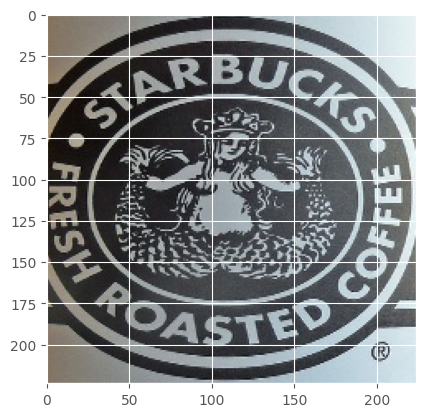

In [ ]:
predimage(imagePaths[2])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[array([ 0. ,  0. ,  0. , 99.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.1,  0. ,  0. ,  0.2], dtype=float32)]
Citroen


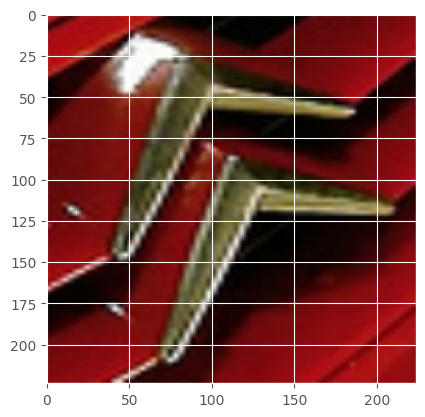

In [ ]:
predimage(imagePaths[60])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[array([ 1.3,  0. ,  0. ,  1.6,  0. ,  0.2,  0. ,  0.2,  0. ,  0. ,  0. ,
        0.1,  0. ,  2.7,  0.1,  0. , 91.9,  0. ,  0. ,  0. ,  0.3,  0. ,
        0.1,  1.2,  0. ,  0. ,  0. ], dtype=float32)]
Nike


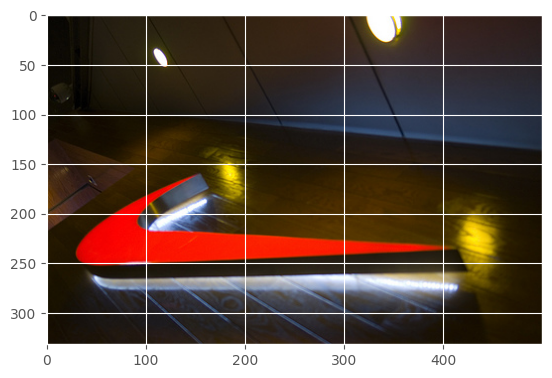

In [ ]:
predimage(testimage[25])

Saving Apple-Logo.png to Apple-Logo.png
Uploaded image: Apple-Logo.png


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Classes: ['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex', 'Ferrari', 'Ford', 'Google', 'HP', 'Heineken', 'Intel', 'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma', 'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone', 'Yahoo']


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
 Predicted Logo: Apple
 Confidence: 99.84%


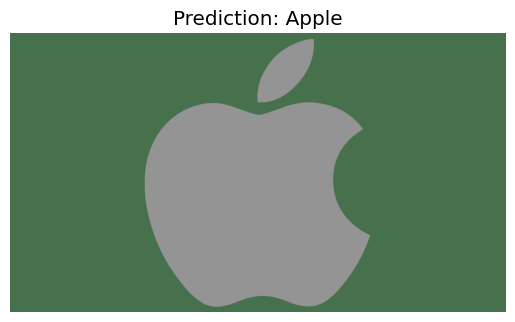

In [ ]:

from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

print("Uploaded image:", img_path)

model = load_model("/content/logo.h5")


class_names = list(validset.class_indices.keys())

print("Classes:", class_names)


img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

print("=======================================")
print(" Predicted Logo:", pred_class)
print(" Confidence: {:.2f}%".format(confidence))
print("=======================================")


import matplotlib.pyplot as plt
plt.imshow(load_img(img_path))
plt.title(f"Prediction: {pred_class}")
plt.axis("off")
plt.show()
